# MEV-CBE Power Roll Up Example

Link to the example in the Cookbook:\
[https://mms.openmbee.org/alfresco/mmsapp/mms.html#/projects/PROJECT-ID_2[...]8/views/_19_0_2_8b50284_1582591660624_573606_56409](https://mms.openmbee.org/alfresco/mmsapp/mms.html#/projects/PROJECT-ID_2_2_17_7_33_25_AM_3ccfaf88_159fe0d7ba9__7d4e_cae_tw_jpl_nasa_gov_127_0_0_1/master/documents/_18_0_6_88f0277_1497548395207_75642_302748/views/_19_0_2_8b50284_1582591660624_573606_56409)


## Structure & Behavior
![img/MEV_structure.svg](img/MEV_structure.svg)
![img/Comp1.jpg](img/Comp1.jpg)
## Analysis
![img/MEV_analysis.svg](img/MEV_analysis.svg)
## Constraint
![img/MEV_constraint.svg](img/MEV_constraint.svg)


In [7]:
package 'MEVCBEPowerRollUp'{
    import ScalarValues::Real;
    import ScalarFunctions::sum;
    import 'Power Roll-Up Pattern'::*;
    import Behavior::*;
    import Structure::*;
    
    value type Power specializes Real;
    
    package 'Power Roll-Up Pattern' {
        block 'PowerRollUpPattern'{
            part subPower : 'PowerRollUpPattern'[*];
                
//                 value 'power' : Power;
            
            value 'totalPower' : Power = sum(subPower::totalPower); //+ prBehavior::power;
            
            state prBehavior : 'Simple Power Behavior'{
                value 'power' : Power;
            }
                
            exhibit prBehavior;
        }

       state def 'Simple Power Behavior'{
           value 'power' : Power;
       }
           
    } // END package 'Power Roll-Up Pattern'

    
    package Behavior {
        value type e1;
        value type e2;
        value s1Power : Power;
        value s2Power : Power;
        
        state def 'Component Behavior' specializes 'Power Roll-Up Pattern'::'Simple Power Behavior' {
            entry; then S1;
           
            state S1{
                // assert unbound power == s1Power; // if using a solver
                entry action{
                    value redefines power = s1Power; 
                }
            }

            transition S1_to_S2
                first S1
                accept e1 then S2;
            
            state S2{
                entry action{
                    power = s2Power; 
                }
            }
            
            transition S2_to_S1
                first S2
                accept e2 then S1;
        } // END state def 'Component Behavior'
    } // END package Behavior
    
    package 'Structure' {
        block Car{
            part comp1 : Comp1;
            part comp2 : Comp2;
        }
        
        block Comp1 {
            state c1Behavior : 'Component Behavior';
            exhibit c1Behavior;
            value s1Power : Power = 1;
            value s2Power : Power = 2;
        }
        
        block Comp2{
            state c2Behavior : 'Component Behavior';
            exhibit c2Behavior;
            value s1Power : Power = 3;
            value s2Power : Power = 4;
        }
    }
    
    package Configurations {
        // how to specify different configs?
    }
    
    package 'Analysis' {
        block 'Car CBE' specializes Car, PowerRollUpPattern{
            value totalPower = totalPower;
            
            part redefines comp1 subsets subPower {
                // having two exhibited behaviors now. Both have a power VP
                // need to bind power from roll-up pattern behavior to power in component behavior
                // prBehavior::power = c1Behavior::power; // possible?
                // or redefine both inherited behaviors
                // exhibit behavior:'Component Behavior' redefines prBehavior, c1Behavior; // is that possible?
                value redefines s1Power = 1;
                value redefines s2Power = 2;
            }
            part redefines comp2 subsets subPower {
                value redefines s1Power = 7;
                value redefines s2Power = 4;
            }
        }
        
        block 'Car MEV' specializes Car, 'PowerRollUpPattern'{
            value totalPower = totalPower;

            part redefines comp1 subsets subPower {
                value redefines s1Power = 1;
                value redefines s2Power = 2;
            }
            part redefines comp2 subsets subPower {
                value redefines s1Power = 3;
                value redefines s2Power = 4;
            }
        }
 
        block Analysis {
            value e1;
            value e2;
            value margin : Real = carMEV::totalPower - carCBE::totalPower;
            
            part carCBE : 'Car CBE';
            part carMEV : 'Car MEV';
            
            action analysisSignals{
                send e1 to carCBE::comp1;
                send e1 to carCBE::comp2;
                send e1 to carMEV::comp1;
                send e1 to carMEV::comp2;
            }
        }
    } // END package 'Analysis'
    
}


Package MEVCBEPowerRollUp (c3f1ba55-15ab-4857-aee7-f953473736bb)


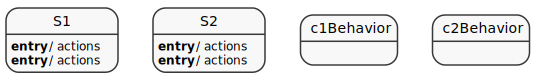

In [5]:
%viz --view=StateMachine MEVCBEPowerRollUp